<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/ADVANCED-ML/2348549_AML_LAB_4(POLYNOMIAL_REGRESSION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


In [12]:

# Load the dataset
df = pd.read_csv('/content/Program_4_Dataset - Program_4_Dataset.csv')


In [13]:
df.head()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2878 non-null   int64  
 1   OS_Time_Stamp  2878 non-null   int64  
 2   Temperature    2878 non-null   float64
 3   Pressure       2878 non-null   float64
 4   Humidity       2878 non-null   float64
 5   TimeStamp      2878 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 135.0+ KB


In [15]:
df.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

In [16]:

# 1. Consider Temperature as predictor and the target as pressure
X = df['Temperature'].values.reshape(-1, 1)
y = df['Pressure'].values


In [17]:

# 2. Build a model using polynomial regression with at least 6 different degrees
degrees = [2, 3, 4, 5, 6, 7]



Polynomial Degree: 2

Train-Test Split: 65-34
R2 Score: 0.6267
Mean Squared Error: 26.3822
Mean Absolute Error: 3.6887


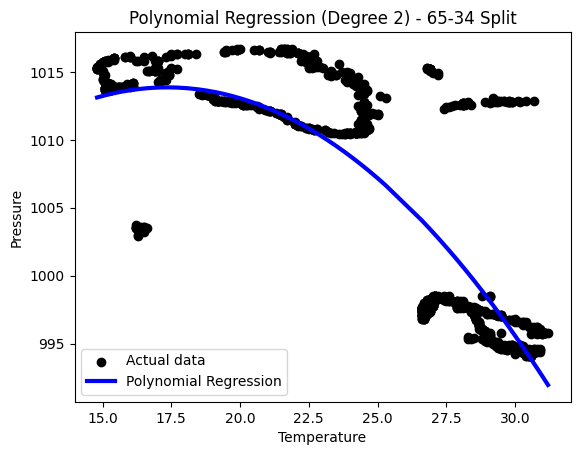


Train-Test Split: 70-30
R2 Score: 0.6453
Mean Squared Error: 25.1449
Mean Absolute Error: 3.6223


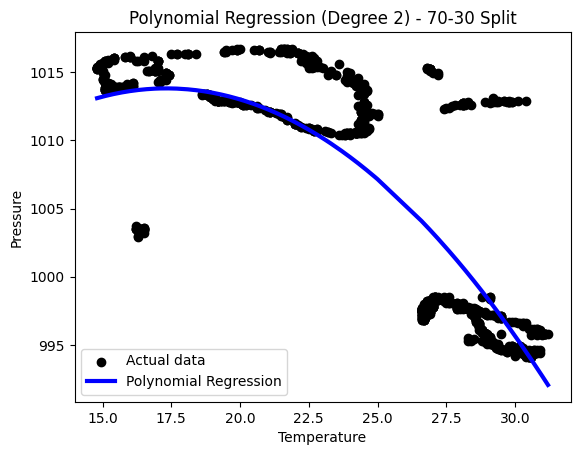


Train-Test Split: 80-20
R2 Score: 0.6263
Mean Squared Error: 26.5274
Mean Absolute Error: 3.6629


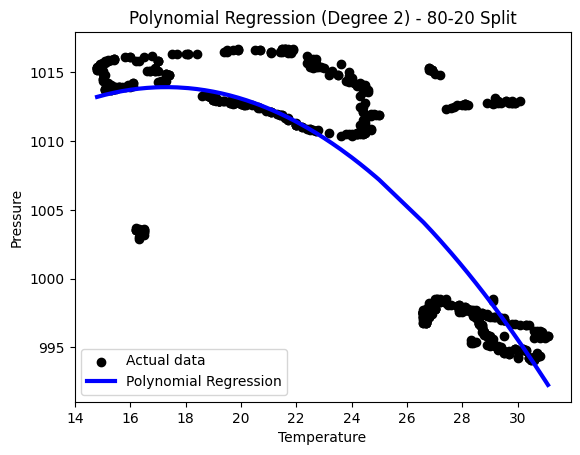


Polynomial Degree: 3

Train-Test Split: 65-34
R2 Score: 0.6430
Mean Squared Error: 25.2314
Mean Absolute Error: 3.7470


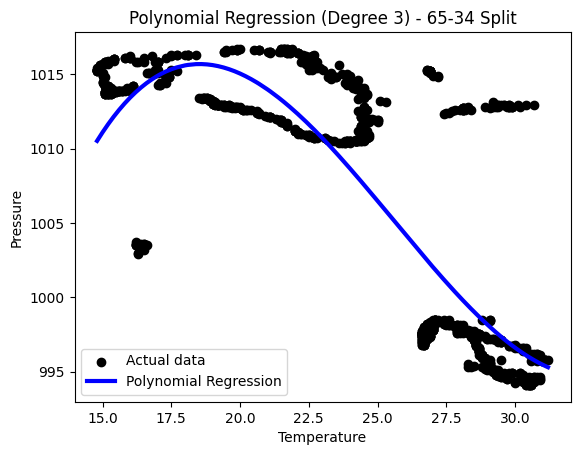


Train-Test Split: 70-30
R2 Score: 0.6572
Mean Squared Error: 24.3021
Mean Absolute Error: 3.7071


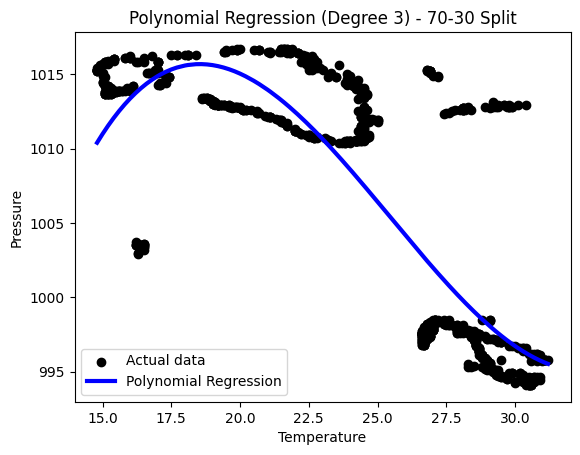


Train-Test Split: 80-20
R2 Score: 0.6347
Mean Squared Error: 25.9346
Mean Absolute Error: 3.7780


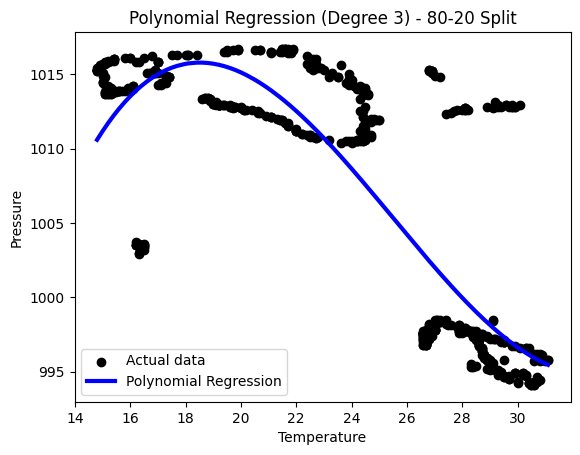


Polynomial Degree: 4

Train-Test Split: 65-34
R2 Score: 0.6828
Mean Squared Error: 22.4142
Mean Absolute Error: 3.2353


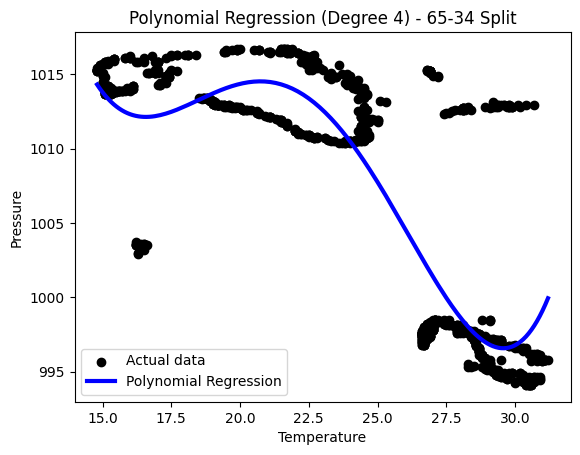


Train-Test Split: 70-30
R2 Score: 0.6942
Mean Squared Error: 21.6793
Mean Absolute Error: 3.1853


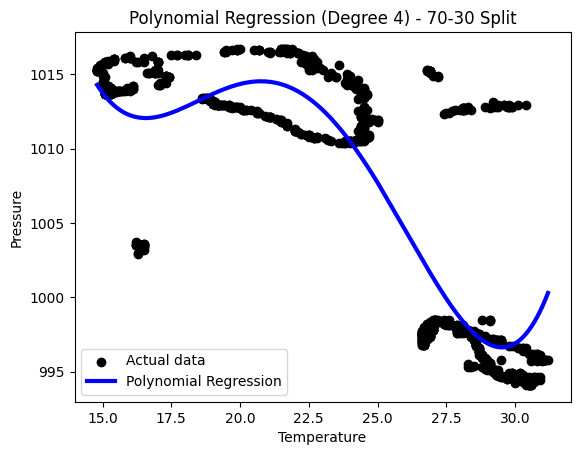


Train-Test Split: 80-20
R2 Score: 0.6725
Mean Squared Error: 23.2531
Mean Absolute Error: 3.2671


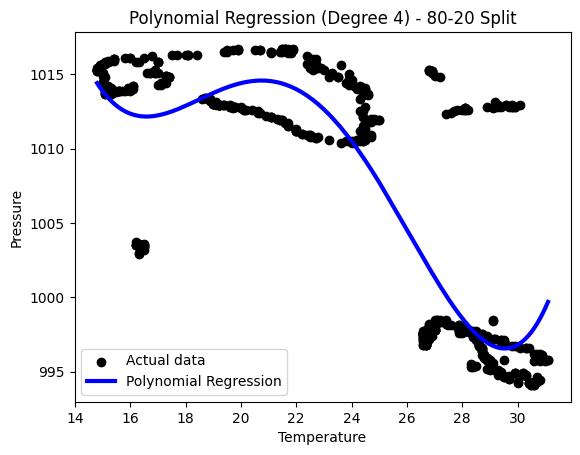


Polynomial Degree: 5

Train-Test Split: 65-34
R2 Score: 0.6946
Mean Squared Error: 21.5850
Mean Absolute Error: 3.3478


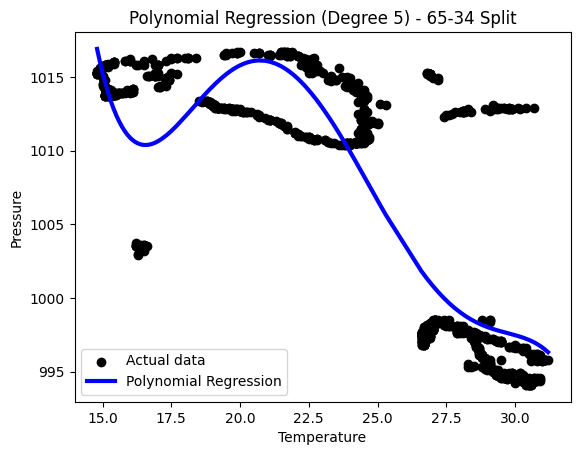


Train-Test Split: 70-30
R2 Score: 0.7042
Mean Squared Error: 20.9675
Mean Absolute Error: 3.3119


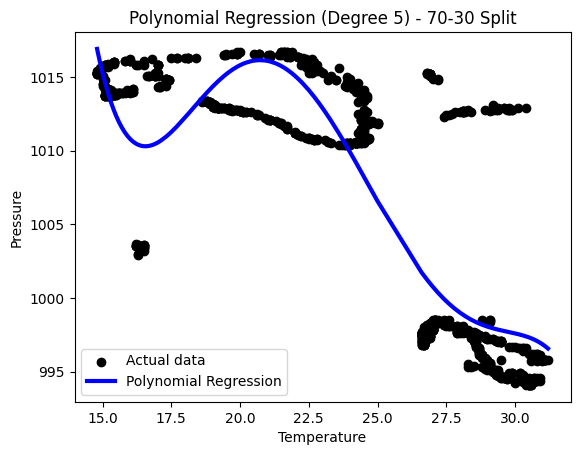


Train-Test Split: 80-20
R2 Score: 0.6829
Mean Squared Error: 22.5095
Mean Absolute Error: 3.4211


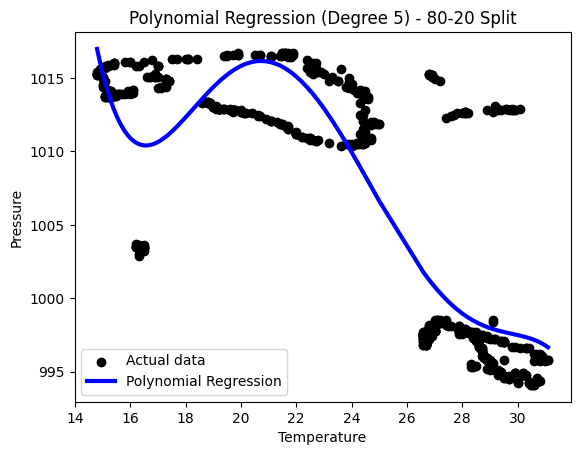


Polynomial Degree: 6

Train-Test Split: 65-34
R2 Score: 0.7078
Mean Squared Error: 20.6478
Mean Absolute Error: 3.1304


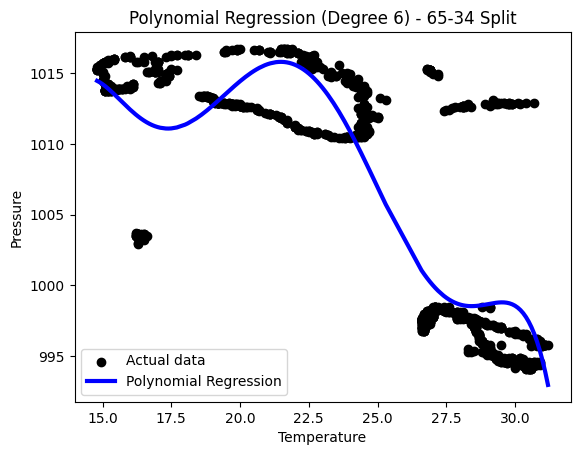


Train-Test Split: 70-30
R2 Score: 0.7175
Mean Squared Error: 20.0236
Mean Absolute Error: 3.0850


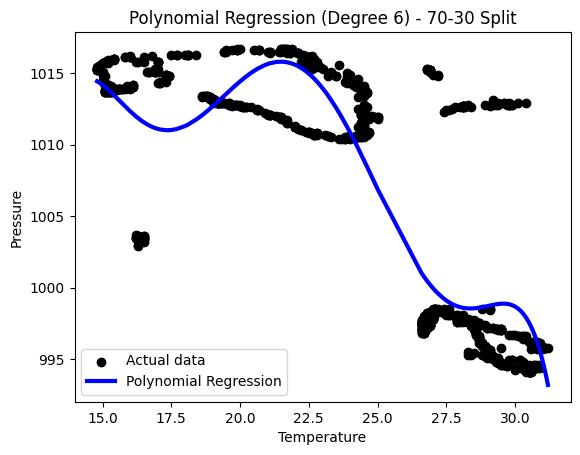


Train-Test Split: 80-20
R2 Score: 0.6955
Mean Squared Error: 21.6154
Mean Absolute Error: 3.2067


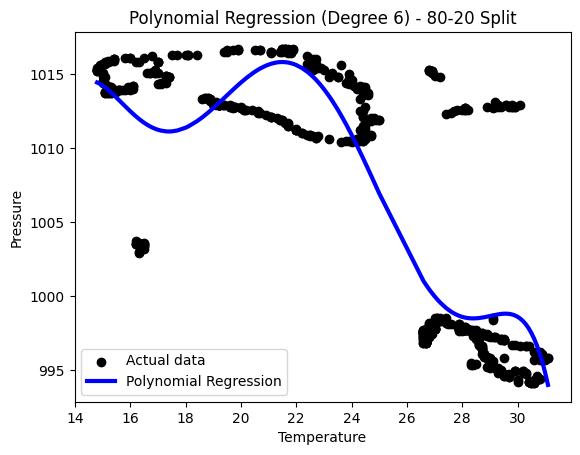


Polynomial Degree: 7

Train-Test Split: 65-34
R2 Score: 0.7148
Mean Squared Error: 20.1528
Mean Absolute Error: 3.1103


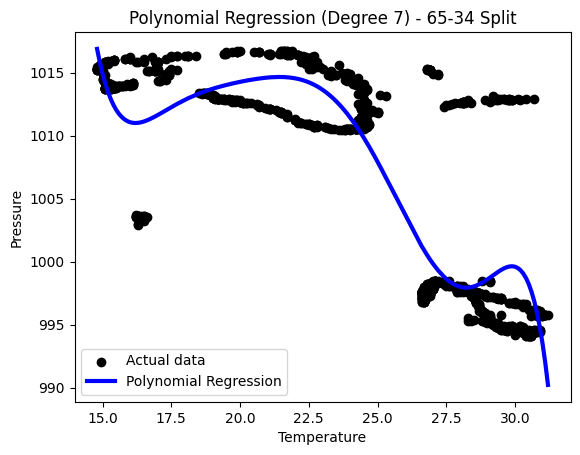


Train-Test Split: 70-30
R2 Score: 0.7214
Mean Squared Error: 19.7483
Mean Absolute Error: 3.0735


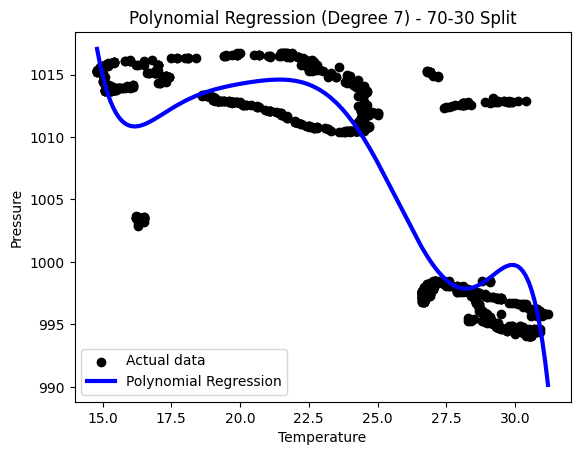


Train-Test Split: 80-20
R2 Score: 0.7042
Mean Squared Error: 20.9994
Mean Absolute Error: 3.1524


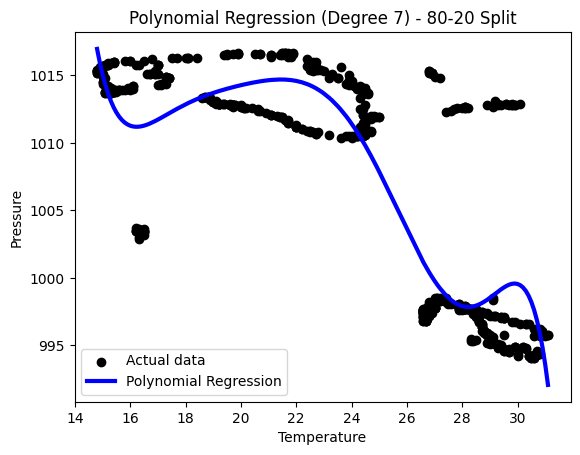

In [20]:

for degree in degrees:
    print(f"\nPolynomial Degree: {degree}")

    for test_size in [0.34, 0.3, 0.2]:  # 66-34, 70-30, 80-20 split
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        # Train the model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predictions
        y_pred = model.predict(X_test_poly)

        # 3. Calculate R2 square, Mean Squared Error, Mean Absolute Error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Print the results
        print(f"\nTrain-Test Split: {int((1-test_size)*100)}-{int(test_size*100)}")
        print(f"R2 Score: {r2:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")

        # Plot the predictions
        plt.scatter(X_test, y_test, color='black', label='Actual data')
        sorted_zip = sorted(zip(X_test, y_pred))
        X_test_sorted, y_pred_sorted = zip(*sorted_zip)
        plt.plot(X_test_sorted, y_pred_sorted, color='blue', linewidth=3, label='Polynomial Regression')
        plt.xlabel('Temperature')
        plt.ylabel('Pressure')
        plt.title(f'Polynomial Regression (Degree {degree}) - {int((1-test_size)*100)}-{int(test_size*100)} Split')
        plt.legend()
        plt.show()


From the above Rsquare, MSE values we can infer the following:

As the polynomial degree increases we can see an increase in the Rsquare value as well.